<a href="https://colab.research.google.com/github/K12TK013A1N/ML-30/blob/main/day4_random_forest_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
print("All imported success!!")

All imported success!!


In [2]:
#@title Load Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map(dict(enumerate(iris.target_names)))



In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


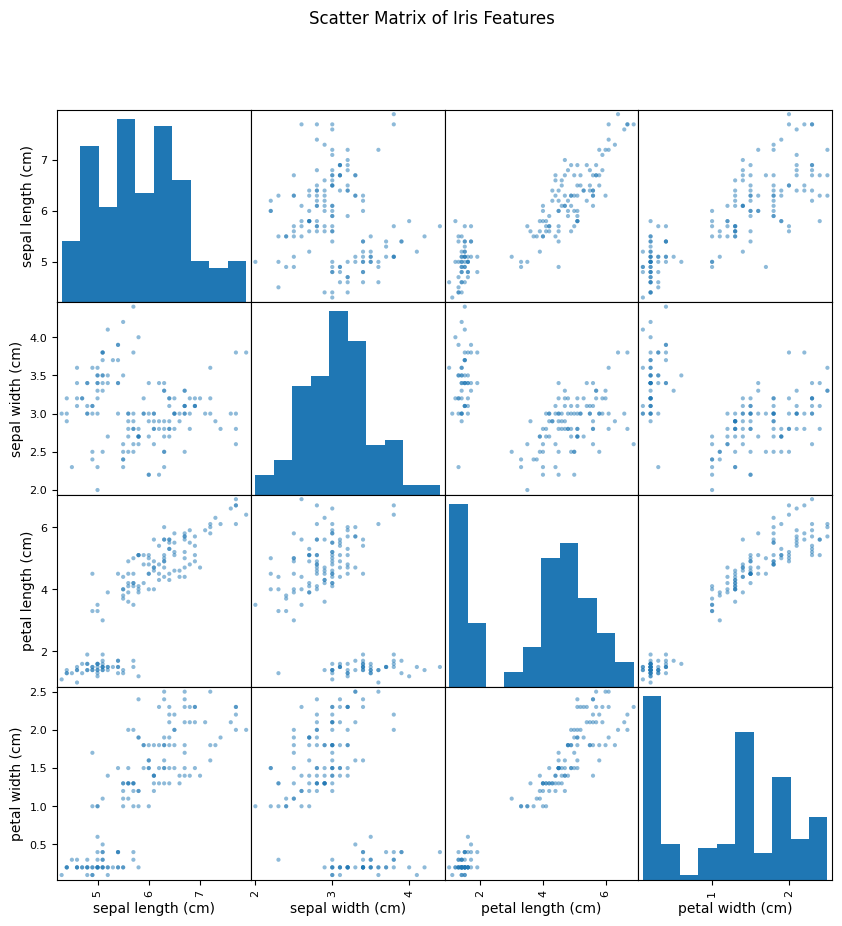

In [6]:
#@title Data vizualization
scatter_matrix(df[iris.feature_names], figsize=(10,10), diagonal='hist')
plt.suptitle("Scatter Matrix of Iris Features")
plt.show()

In [10]:
#@title Data Preparation
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42, stratify=iris.target
)
print(X_train[:10])
print(X_test[:10])

[[5.1 2.5 3.  1.1]
 [6.2 2.2 4.5 1.5]
 [5.1 3.8 1.5 0.3]
 [6.8 3.2 5.9 2.3]
 [5.7 2.8 4.1 1.3]
 [6.7 3.  5.2 2.3]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.6 0.2]
 [4.4 2.9 1.4 0.2]
 [7.1 3.  5.9 2.1]]
[[7.3 2.9 6.3 1.8]
 [6.1 2.9 4.7 1.4]
 [6.3 2.8 5.1 1.5]
 [6.3 3.3 4.7 1.6]
 [6.1 3.  4.9 1.8]
 [6.7 3.1 5.6 2.4]
 [5.5 2.3 4.  1.3]
 [5.6 2.5 3.9 1.1]
 [5.4 3.4 1.7 0.2]
 [6.9 3.1 5.1 2.3]]


In [11]:
#@title Training the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

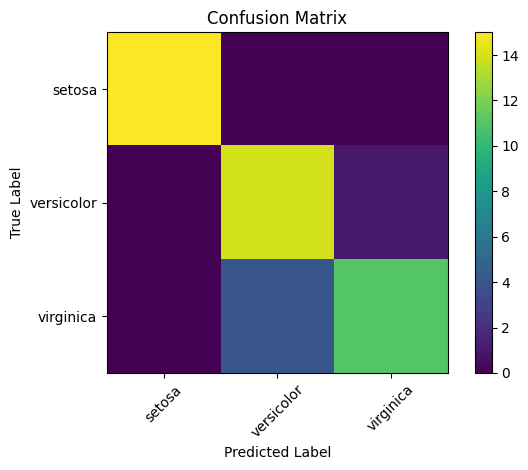

In [12]:
#@title Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm,interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

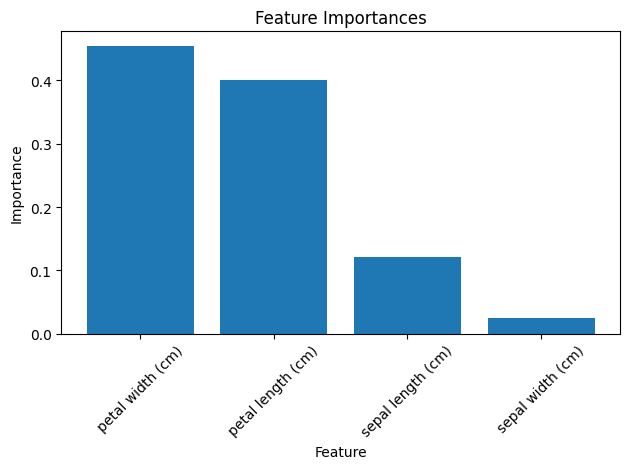

In [13]:
#@title Feature Importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), np.array(iris.feature_names)[indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

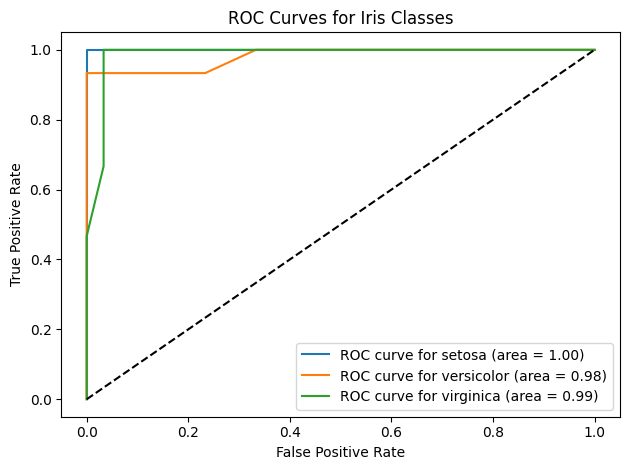

In [14]:
#@title ROC

y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = rf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(iris.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i, color in zip(range(len(iris.target_names)), ['b', 'g', 'r']):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve for {iris.target_names[i]} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curves for Iris Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()